<a href="https://colab.research.google.com/github/SriVarshan733/ADS-A2-5537/blob/main/ADS_A2_5537.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **NAME : SRIVARSHAN MEIPRAKASH**
##**DATASET LINK**  : https://www.kaggle.com/datasets/bhadramohit/social-media-usage-datasetapplications

# About Dataset

## Context
This dataset provides valuable insights into the usage patterns of social media apps across 1,000 users, spanning seven popular platforms: Facebook, Instagram, Twitter, Snapchat, TikTok, LinkedIn, and Pinterest. The dataset tracks key metrics such as the daily time spent on each app, the number of posts created, the likes received, and the new followers gained. This information can be used to analyze user engagement and activity on various social media platforms.

## Dataset Features
- **User_ID**: Unique identifier for each user.
- **App**: The social media platform being used (e.g., Facebook, Instagram, etc.).
- **Daily_Minutes_Spent**: Total time (in minutes) a user spends on the app daily, ranging from 5 to 500 minutes.
- **Posts_Per_Day**: Number of posts a user creates each day, ranging from 0 to 20 posts.
- **Likes_Per_Day**: The total number of likes a user receives on their posts per day, ranging from 0 to 200 likes.
- **Follows_Per_Day**: The number of new followers a user gains daily, ranging from 0 to 50 followers.

## Context & Use Cases
This dataset is highly relevant for social media analysts, digital marketers, and researchers looking to understand user behavior across various platforms. The information captured can help:
- Track the time users spend on different platforms.
- Measure how frequently users post content.
- Examine the engagement levels in terms of likes and new followers.
  
## Conclusion & Outcome
Analyzing this dataset could lead to several key insights, including:
- **Engagement Patterns**: Understanding which platforms have the highest engagement based on time spent, likes received, and followers gained.
- **Active Users**: Identifying the most active users across platforms based on their posting frequency and new followers.
- **User Retention**: Exploring the relationship between time spent on an app and the growth in followers, which can provide insights into user retention strategies for various platforms.

This dataset provides a comprehensive view of social media usage trends, making it a valuable resource for driving data-driven decisions in digital marketing, content creation, and platform engagement strategies.

## 1. Importing Libraries
We begin by importing several libraries necessary for data analysis, visualization, and machine learning:

- **pandas**: Used for data manipulation and analysis. It helps in handling data in DataFrame format.
- **numpy**: Provides support for numerical operations and handling arrays.
- **seaborn** and **matplotlib.pyplot**: Libraries for data visualization, used to create plots and graphs.
- **sklearn.cluster.KMeans**: The KMeans algorithm is used for clustering the data into distinct groups based on similarity.
- **sklearn.preprocessing.StandardScaler**: Used for feature scaling, particularly standardizing the data to have a mean of 0 and a standard deviation of 1. This is important for algorithms like KMeans, which are sensitive to differences in feature magnitudes.
- **sklearn.metrics.silhouette_score**: This function helps evaluate the quality of the clusters formed by the KMeans algorithm. It measures how similar points are within their own cluster compared to other clusters.
- **sklearn.linear_model.LinearRegression**: Used for applying linear regression models to fit data and make predictions.
- **sklearn.model_selection.train_test_split**: A utility function to split the dataset into training and testing sets for model evaluation.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Loading the Dataset using pandas library

In [ ]:
data = pd.read_csv("/content/social_media_usage.csv")

The code generates descriptive statistics of the dataset, providing a summary of the central tendency, dispersion, and shape of the distribution for each numerical column.

In [ ]:
print(data.describe())

       Daily_Minutes_Spent  Posts_Per_Day  Likes_Per_Day  Follows_Per_Day
count          1000.000000    1000.000000    1000.000000      1000.000000
mean            247.368000      10.269000      94.682000        24.698000
std             146.371921       6.121774      57.560943        14.842948
min               5.000000       0.000000       0.000000         0.000000
25%             112.750000       5.000000      44.750000        12.000000
50%             246.000000      10.000000      94.000000        24.000000
75%             380.500000      16.000000     142.000000        38.000000
max             500.000000      20.000000     200.000000        50.000000


The code displays the data types of each column in the dataset, helping to identify the type of data (e.g., integer, float, or object) for further processing or analysis.

In [ ]:
print(data.dtypes)

User_ID                object
App                    object
Daily_Minutes_Spent     int64
Posts_Per_Day           int64
Likes_Per_Day           int64
Follows_Per_Day         int64
dtype: object


## 2. Correlation Matrix

This code selects only the numeric columns from the dataset and computes their correlation matrix to analyze the relationships between the variables. A heatmap is then visualized using Seaborn, where the correlation values are annotated and displayed with a color gradient, helping to identify strong positive or negative correlations between the features.


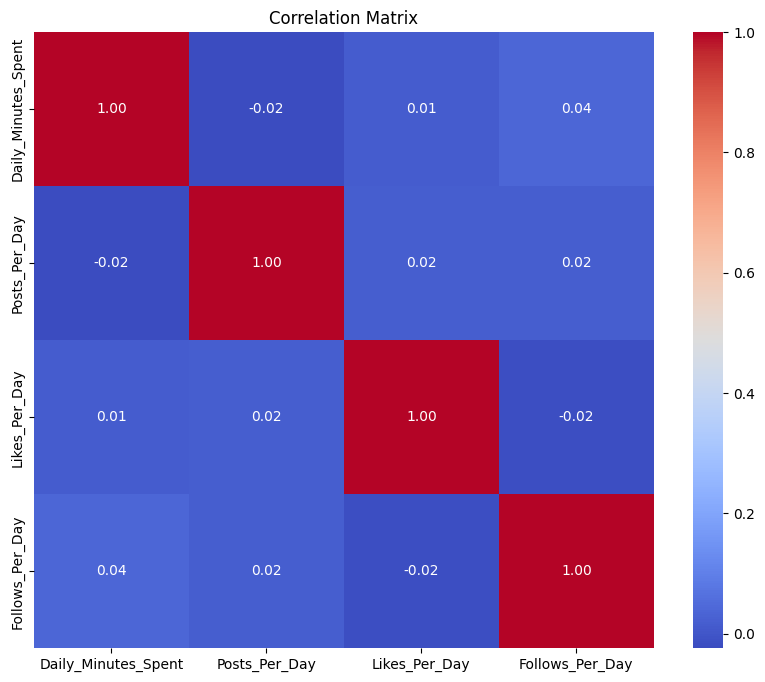

In [ ]:
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute and visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

## 3. Correlation Matrix
This function `plot_bar_chart` calculates the average daily time spent on each social media app by grouping the data by the "App" column and computing the mean of "Daily_Minutes_Spent". It then generates a bar chart using Matplotlib, displaying the average time spent on each app, with appropriate labels for clarity. The function is called on the dataset to visualize the results.


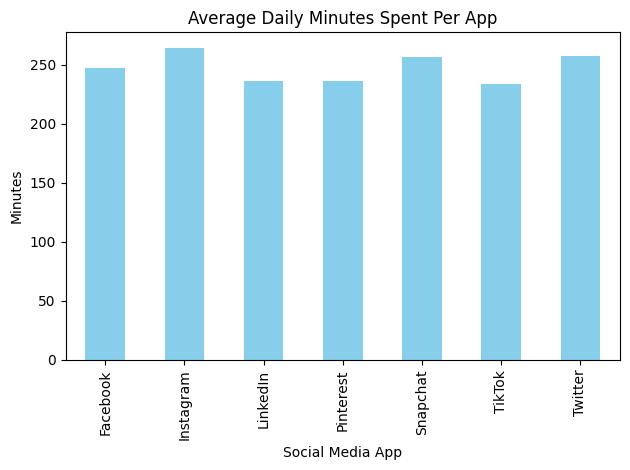

In [ ]:
def plot_bar_chart(data):
    """
    Function to create a bar chart showing average daily time spent on each app.
    """
    avg_time_spent = data.groupby("App")["Daily_Minutes_Spent"].mean()
    avg_time_spent.plot(kind='bar', color='skyblue')
    plt.title("Average Daily Minutes Spent Per App")
    plt.ylabel("Minutes")
    plt.xlabel("Social Media App")
    plt.tight_layout()
    plt.show()

plot_bar_chart(data)

## 4. Scatter Plot

The `plot_scatter` function creates a scatter plot to visualize the relationship between "Daily Minutes Spent" and "Follows Per Day." The plot helps to explore whether there is any correlation between the time spent on social media and the number of new followers gained each day. The function also adds a grid for better readability and clarity of the plot.

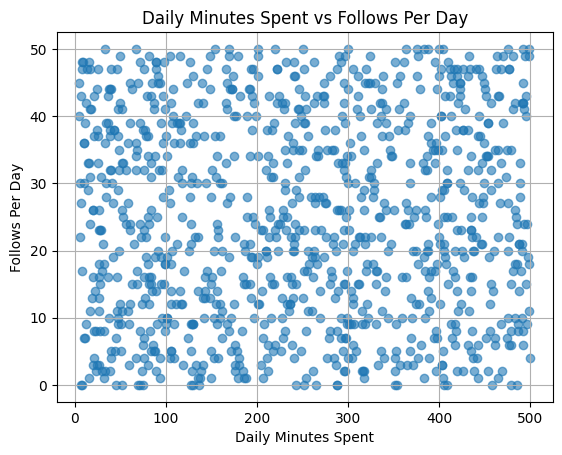

In [ ]:
def plot_scatter(data):
    """
    Function to create a scatter plot for Daily Minutes Spent vs Follows Per Day.
    """
    plt.scatter(data['Daily_Minutes_Spent'], data['Follows_Per_Day'], alpha=0.6)
    plt.title("Daily Minutes Spent vs Follows Per Day")
    plt.xlabel("Daily Minutes Spent")
    plt.ylabel("Follows Per Day")
    plt.grid(True)
    plt.show()

plot_scatter(data)

## 5. Elbow Plot

The `plot_elbow` function generates an elbow plot to help determine the optimal number of clusters for K-means clustering. It first standardizes the specified features using `StandardScaler` to ensure all features have the same scale. The function then runs K-means clustering for different values of k (from 1 to 10) and calculates the distortion (inertia) for each k. The plot visualizes how distortion changes with the number of clusters, with the "elbow" point suggesting the optimal number of clusters. In this case, the function is applied to the "Daily_Minutes_Spent" and "Follows_Per_Day" columns.


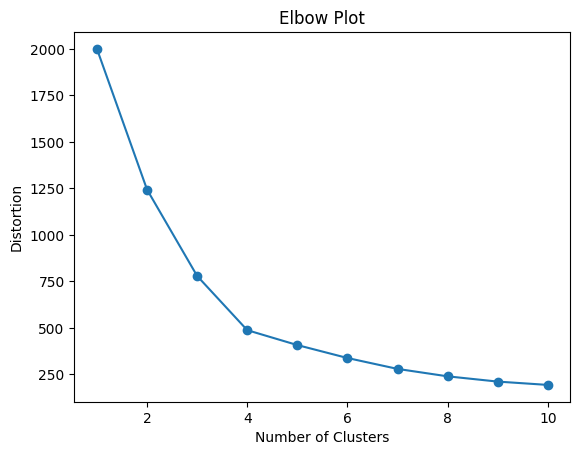

In [ ]:
def plot_elbow(data, features):
    """
    Function to create an elbow plot for k-means clustering.
    """
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data[features])

    distortions = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_data)
        distortions.append(kmeans.inertia_)

    plt.plot(range(1, 11), distortions, marker='o')
    plt.title("Elbow Plot")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Distortion")
    plt.show()

plot_elbow(data, ['Daily_Minutes_Spent', 'Follows_Per_Day'])

## 5. K-Means Clustering

The function `perform_clustering` performs K-means clustering on the specified features of the dataset. It first standardizes the data using `StandardScaler` to ensure all features are on the same scale. The KMeans algorithm is applied with a specified number of clusters (`n_clusters`), and the cluster assignments are added to the dataset. The function then visualizes the clustering results by plotting a scatter plot of the two chosen features, with data points colored according to their cluster assignments. Additionally, the centroids of each cluster are marked with red 'x' symbols. This helps in understanding the segmentation of the data based on the chosen features.


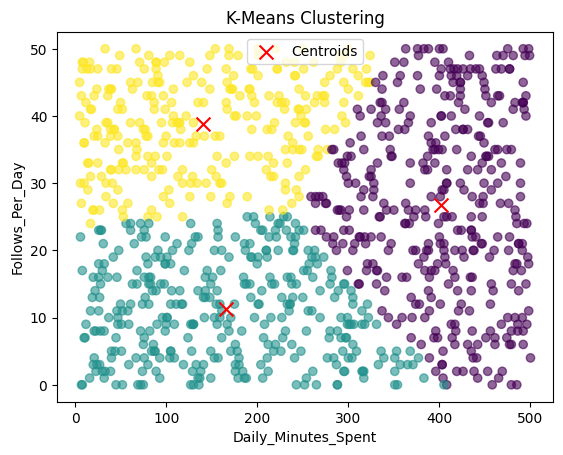

In [ ]:
def perform_clustering(data, features, n_clusters):
    """
    Function to perform k-means clustering and visualize results.
    """
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data[features])

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    data['Cluster'] = kmeans.fit_predict(scaled_data)
    centroids = scaler.inverse_transform(kmeans.cluster_centers_)

    plt.scatter(data[features[0]], data[features[1]], c=data['Cluster'], cmap='viridis', alpha=0.6)
    plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=100, label='Centroids')
    plt.title("K-Means Clustering")
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.legend()
    plt.show()

perform_clustering(data, ['Daily_Minutes_Spent', 'Follows_Per_Day'], n_clusters=3)

## 6. Line Fitting
The function `line_fitting` applies linear regression to predict the number of "Follows Per Day" based on "Daily Minutes Spent." It splits the data into training and testing sets, trains a linear regression model, and visualizes the actual vs predicted values on a scatter plot with a fitted line. The model's coefficient and intercept are printed to understand the relationship between the variables. The function is executed on the dataset to demonstrate the line fitting process.

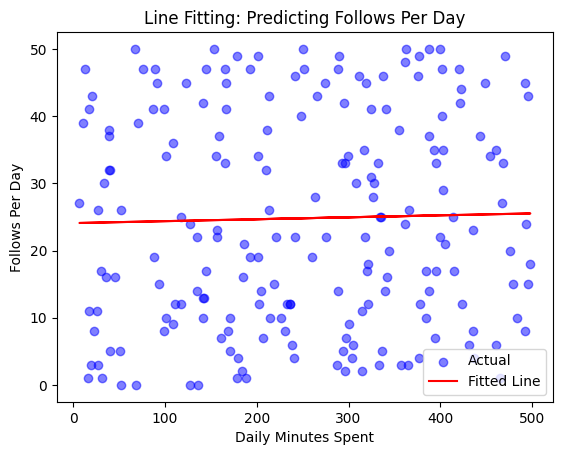

Model Coefficient: 0.0028845136429828987, Intercept: 24.07943496267906


In [ ]:
def line_fitting(data):
    """
    Function to fit a line for predicting Follows Per Day based on Daily Minutes Spent.
    """
    X = data[['Daily_Minutes_Spent']]
    y = data['Follows_Per_Day']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions and visualization
    y_pred = model.predict(X_test)
    plt.scatter(X_test, y_test, color='blue', alpha=0.5, label="Actual")
    plt.plot(X_test, y_pred, color='red', label="Fitted Line")
    plt.title("Line Fitting: Predicting Follows Per Day")
    plt.xlabel("Daily Minutes Spent")
    plt.ylabel("Follows Per Day")
    plt.legend()
    plt.show()

    print(f"Model Coefficient: {model.coef_[0]}, Intercept: {model.intercept_}")

line_fitting(data)
